# Moment normal force interaction
```{Note}
De grafieken zijn gebaseerd op EC2, 6.1 en 3.1.7(1), hetgeen inhoudt dat er is gerekend met het parabool-rechthoek spanning-rek-diagram.

Er is geen gebruikgemaakt van het sterkte-verhogende effect van omsluiting van het beton door de beugels volgens EC2, 3.1.9(2).

Ingevolge EC2, 6.1(5) moet de gemiddelde stuik worden beperkt, waardoor bij vrijwel centrische druk geen vloei van het staal optreedt, immers $ \varepsilon_{c2} < \varepsilon_{sy}$.

Omdat, gezien EC2, 6.1(4) $\frac{e}{h}$ nooit kleiner mag zijn dan 1/30 is de top van de figuur afgekapt met de horizontale lijn waar de bezwijkcontour de diagonaal $ \frac{e}{h} = \frac{1}{3}$ snijdt.

$ e = \frac{M_{Ed}}{N_{Ed}}$, waarin $M_{Ed}$ de rekenwaarde is van het buigend moment, inclusief het tweede-orde moment.

Voor de grafieken tot en met C45/55 wordt de mechanische wapeningsverhouding $\rho \cdot \frac{f_{yd}}{f_cd}$ afgelezen, waaruit $\rho$ te bepalen is. Voor de grafieken vanaf C55/67 wordt de wapeningsverhouding $\rho$ direct afgelezen.

In de koptekst op de navolgende bladen is 0.10 en 0.15 steeds de $\frac{a}{h}$ waarde.
```

```{figure} Images/Reinforcement_Table3.jpg
---
---
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Example Concrete & Steel structures

The following code shows an example that was part of an assignment for the BSc course Concrete & Steel Structures in the year 2023-2024.

It assumes a linear $\sigma$-$\varepsilon$ diagram.
```{figure} Images/bi_linear_sigma_eps.png

Bi-linear $\sigma$-$\varepsilon$ diagram
```

The corner points of the Moment-Normal force have been calculated. Visually those are shown in. Also the situation for an tensile force and only a moment is added.
```{figure} Images/4_grenssituaties.png

4 grenssituaties
```

In [2]:
f_ck = 30 #[N/mm^2] C30/37
f_cd = f_ck/1.5
alfa = 0.75
beta = 7/18
eps_c2 = 0.00175
eps_cu3 = 0.0035

f_yk = 500 #[N/mm^2] B500B
f_yd = f_yk/1.15
eps_s = 0.002175

c = 13 #[mm]
phi_bgl = 6 #[mm]
n_hw = 4 #[-] aantal staven
phi_hw = 12 #[mm]
E_s = 200000 #[N/mm^2]
E_cm = 200000 #[N/mm^2]
phi_eff = 1.2 #[-]
e = 100 #[mm]

b = 250 #[mm]
h = 250 #[mm]
N_Ed = 261 #[kN]

### Grenssituatie 0: zuivere buiging, geen normaalkracht

In [3]:
a = c + phi_bgl + phi_hw/2
print(a/h)
A_s = 1/4 * np.pi * phi_hw**2 * n_hw
x_u0 = A_s * f_yd / (alfa * b * f_cd)
M_Rd0 = A_s * f_yd * (h - a - beta * x_u0) / 1e6
N_Rd0 = 0

print(f'a = {a:.2f} mm')
print(f'A_s = {A_s:.2f} mm^2')
print(f'x_u0 = {x_u0:.2f} mm')
print(f'M_Rd0 = {M_Rd0:.1f} kNm')
print(f'N_Rd0 = {N_Rd0:.1f} kN')

0.1
a = 25.00 mm
A_s = 452.39 mm^2
x_u0 = 52.45 mm
M_Rd0 = 40.2 kNm
N_Rd0 = 0.0 kN


### Grenssituatie 1: gedrukte wapening vloeit op druk, maximale betonstuik bereikt

In [4]:
x_u1 = a / (1 - eps_s/eps_cu3)
e_sc = e_st = h/2 - a
eps_st1 = eps_s
eps_sc1 = eps_s

N_st1 = N_sc1 = E_s * eps_st1 * A_s
N_c1 = alfa * b * f_cd * x_u1
eps_c1 = h/2 - beta * x_u1
M_Rd1 = (N_st1*e_st + N_sc1 * e_sc + N_c1 * eps_c1) / 1e6
N_Rd1 = (- N_st1 + N_sc1 + N_c1) / 1e3

print(f'x_u1 = {x_u1:.2f} mm')
print(f'e_sc = e_st = {e_sc:.2f} mm')
print(f'N_st1 = N_sc1 = {N_sc1:.3e} N')
print(f'N_c1 = {N_c1:.3e} N')
print(f'M_Rd1 = {M_Rd1:.1f} kNm')
print(f'N_Rd1 = {N_Rd1:.1f} kN')

x_u1 = 66.04 mm
e_sc = e_st = 100.00 mm
N_st1 = N_sc1 = 1.968e+05 N
N_c1 = 2.476e+05 N
M_Rd1 = 64.0 kNm
N_Rd1 = 247.6 kN


### Grenssituatie 2: Getrokken wapening vloeit op trek, maximale betonstuik bereikt

In [5]:
x_u2 = eps_cu3 * (h - a) / (eps_s + eps_cu3)
e_c2 = h/2 - beta * x_u2
eps_st2 = eps_s
N_st2 = E_s * eps_st2 * A_s
eps_sc2 = min(eps_s, eps_cu3 * (x_u2 - a) / x_u2)
N_sc2 = E_s * eps_sc2 * A_s
N_c2 = alfa * b * f_cd * x_u2
M_Rd2 = (N_st2*e_st + N_sc2 * e_sc + N_c2 * e_c2) / 1e6
N_Rd2 = (- N_st2 + N_sc2 + N_c2) / 1e3

print(f'x_u2 = {x_u2:.2f} mm')
print(f'e_c2 = {e_c2:.2f}')
print(f'eps_c2 = {eps_c2:.5f}')
print(f'N_st2 = {N_st2:.3e} N')
print(f'N_sc2 = {N_sc2:.3e} N')
print(f'N_c2 = {N_c2:.3e} N')
print(f'M_Rd2 = {M_Rd2:.1f} kNm')
print(f'N_Rd2 = {N_Rd2:.1f} kN')

x_u2 = 138.77 mm
e_c2 = 71.04
eps_c2 = 0.00175
N_st2 = 1.968e+05 N
N_sc2 = 1.968e+05 N
N_c2 = 5.204e+05 N
M_Rd2 = 76.3 kNm
N_Rd2 = 520.4 kN


### Grenssituatie 3: maximale betonstuik bereikt, $x_{u3} = h$.

In [6]:
x_u3 = h
e_c3 = h/2 - beta * x_u3
eps_st3 = min(eps_s, (eps_cu3 * a) / x_u3)
N_st3 = E_s * eps_st3 * A_s
eps_sc3 = min(eps_s, eps_cu3 * (x_u3 - a) / x_u3)
N_sc3 = E_s * eps_sc3 * A_s
N_c3 = alfa * b * f_cd * x_u3
M_Rd3 = (-N_st3*e_st + N_sc3 * e_sc + N_c3 * e_c3) / 1e6
N_Rd3 = (N_st3 + N_sc3 + N_c3) / 1e3

print(f'x_u3 = {x_u3:.2f} mm')
print(f'e_c3 = {e_c3:.2f}')
print(f'eps_sc3 = {eps_sc3:.5f}')
print(f'N_st3 = {N_st3:.3e} N')
print(f'N_sc3 = {N_sc3:.3e} N')
print(f'N_c3 = {N_c3:.3e} N')
print(f'M_Rd3 = {M_Rd3:.1f} kNm')
print(f'N_Rd3 = {N_Rd3:.1f} kN')

x_u3 = 250.00 mm
e_c3 = 27.78
eps_sc3 = 0.00217
N_st3 = 3.167e+04 N
N_sc3 = 1.968e+05 N
N_c3 = 9.375e+05 N
M_Rd3 = 42.6 kNm
N_Rd3 = 1166.0 kN


### Grenssituatie 4: centrische druk (geen momentcapaciteit)

In [7]:
N_sc4 = E_s * eps_s * A_s
N_st4 = N_sc4
N_c4 = b * f_cd * h
M_Rd4 = 0
N_Rd4 = (N_st4 + N_sc4 + N_c4) / 1e3

print(f'N_st4 = {N_st4:.3e} N')
print(f'N_sc4 = {N_sc4:.3e} N')
print(f'N_c4 = {N_c4:.3e} N')
print(f'M_Rd4 = {M_Rd4:.1f} kNm')
print(f'N_Rd4 = {N_Rd4:.1f} kN')

N_st4 = 1.968e+05 N
N_sc4 = 1.968e+05 N
N_c4 = 1.250e+06 N
M_Rd4 = 0.0 kNm
N_Rd4 = 1643.6 kN


### Grenssituatie 5: centrische trek (geen momentcapaciteit)

In [8]:
N_sc_1 = E_s * eps_s * A_s
N_st_1 = N_sc_1
# N_c4 = b * f_cd * h
N_c_1 = 0
M_Rd_1 = 0
N_Rd_1 = (-N_st_1 + -N_sc_1 + N_c_1) / 1e3

print(f'N_st_1 = {N_st_1:.3e} N')
print(f'N_sc_1 = {N_sc_1:.3e} N')
print(f'N_c_1 = {N_c_1:.3e} N')
print(f'M_Rd_1 = {M_Rd_1:.1f} kNm')
print(f'N_Rd_1 = {N_Rd_1:.1f} kN')

N_st_1 = 1.968e+05 N
N_sc_1 = 1.968e+05 N
N_c_1 = 0.000e+00 N
M_Rd_1 = 0.0 kNm
N_Rd_1 = -393.6 kN


## Diagram

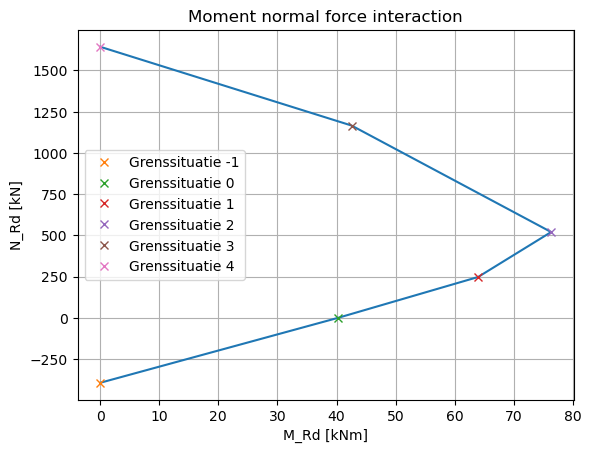

In [9]:
M_Rd = np.array([M_Rd_1, M_Rd0, M_Rd1, M_Rd2, M_Rd3, M_Rd4])
N_Rd = np.array([N_Rd_1, N_Rd0, N_Rd1, N_Rd2, N_Rd3, N_Rd4])


plt.plot(M_Rd, N_Rd)

for i in range(len(M_Rd)):
    plt.plot(M_Rd[i], N_Rd[i], marker='x', linestyle='', label =f'Grenssituatie {i-1}')

plt.title('Moment normal force interaction')
plt.xlabel('M_Rd [kNm]')
plt.ylabel('N_Rd [kN]')
plt.legend()
plt.grid()

# Show the plot
plt.show();

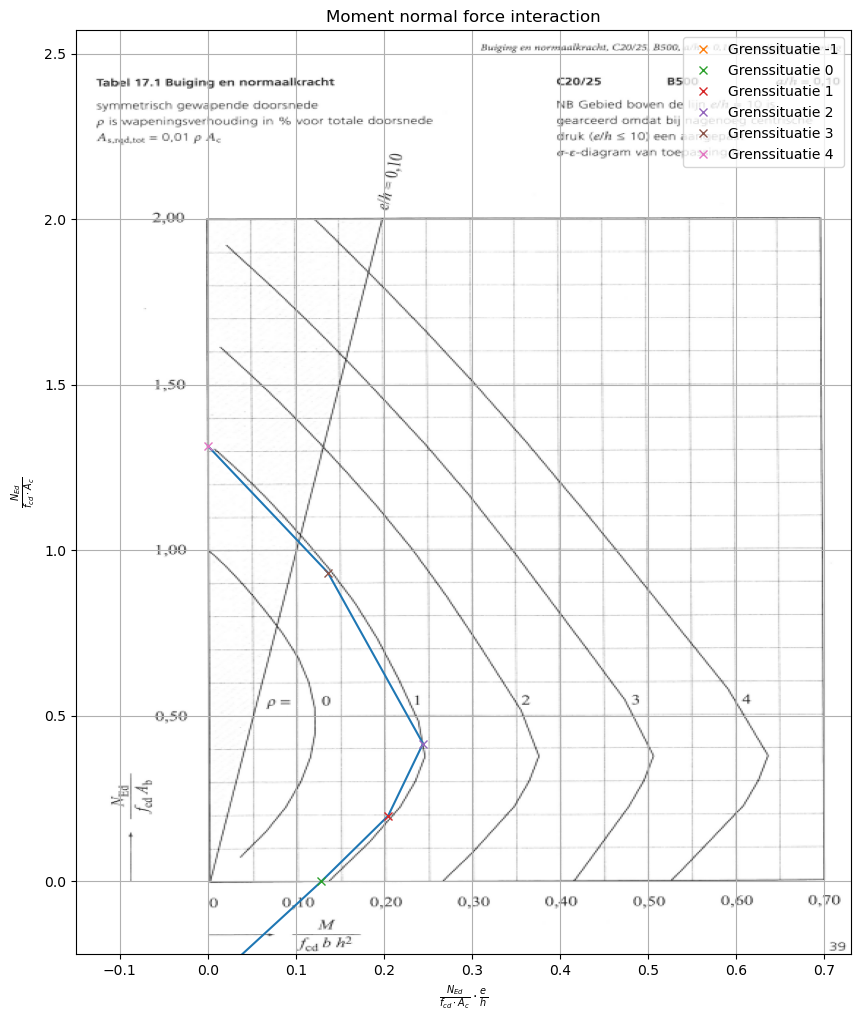

NameError: name 'rho' is not defined

In [10]:
x_values = np.array([M_Rd_1, M_Rd0, M_Rd1, M_Rd2, M_Rd3, M_Rd4])*1e6/(f_cd * b*h)*(1/h)
y_values = np.array([N_Rd_1, N_Rd0, N_Rd1, N_Rd2, N_Rd3, N_Rd4])*1e3/(f_cd * b*h)

# Load the background image
table_image = mpimg.imread('Images/GTB_table2008_bilinear.png')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Display the background image

y_llim = -0.22
y_ulim = 2.57
ax.imshow(table_image, extent=[-0.15, 0.73, y_llim, y_ulim], aspect='auto')


plt.title('Moment normal force interaction')
ax.plot(x_values, y_values)

for i in range(len(M_Rd)):
    ax.plot(x_values[i], y_values[i], marker='x', linestyle='', label =f'Grenssituatie {i-1}')

plt.xlabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c} \cdot \frac{e}{h}$')
plt.ylabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c}$')
plt.ylim(y_llim, y_ulim)
plt.legend()
plt.grid()

# Show the plot
plt.show();
print(f'rho = {rho*100:.2f}%')
print(f'a/h = {a/h:.3f}')

In [ ]:
x_values = np.array([M_Rd_1, M_Rd0, M_Rd1, M_Rd2, M_Rd3, M_Rd4])*1e6/(f_cd * b*h)*(1/h)
y_values = np.array([N_Rd_1, N_Rd0, N_Rd1, N_Rd2, N_Rd3, N_Rd4])*1e3/(f_cd * b*h)

# Load the background image
table_image = mpimg.imread('Images/Reinforcement_Table3.jpg')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Display the background image
ax.imshow(table_image, extent=[-0.09, 0.83, -0.5, 2.88], aspect='auto')


plt.title('Moment normal force interaction')
ax.plot(x_values, y_values)

for i in range(len(M_Rd)):
    ax.plot(x_values[i], y_values[i], marker='x', linestyle='', label =f'Grenssituatie {i-1}')

plt.xlabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c} \cdot \frac{e}{h}$')
plt.ylabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c}$')
plt.legend()
plt.grid()

# Show the plot
plt.show();

In [ ]:
A_c = b * h
rho = 2*A_s/(b*h) #2*A_s because A_s is only the tension or compression reinforcement
line_number = rho * f_yd / f_cd
print(f'rho * f_yd / f_cd = {line_number:.4f}')
print(f'a/h = {a/h:.3f}')

```{Note}
In the above diagram, a bi-linear stress strain relation has been used. Note that for the GTB-table a parabola-rectangle has been assumed, this will actually give rise to sleightly different points.
```

## Example using parabola-rectangle stress strain relations for concrete

According to EC2 stress in the concrete can be calculated using the formula:

$ \sigma_c = f_{cd}[1-(1-\frac{\varepsilon_c}{\varepsilon_c2})^{n}] $ for $0 \leq \varepsilon_c \leq \varepsilon_{c2}$  
$ \sigma_c = f_{cd} $ for $ \varepsilon_{c2} \leq \varepsilon_c \leq \varepsilon_{cu2}$

```{figure} Images/parabolisch_linear_sigma_eps.png

Parabola-rectangle $\sigma$-$\varepsilon$ diagram
```


### Grenssituatie 2: Getrokken wapening vloeit op trek, maximale betonstuik bereikt

In [ ]:
x_u2 = eps_cu3 * (h - a) / (eps_s + eps_cu3)
e_c2 = h/2 - beta * x_u2
eps_st2 = eps_s
N_st2 = E_s * eps_st2 * A_s
eps_sc2 = min(eps_s, eps_cu3 * (x_u2 - a) / x_u2)
N_sc2 = E_s * eps_sc2 * A_s
N_c2 = alfa * b * f_cd * x_u2
M_Rd2 = (N_st2*e_st + N_sc2 * e_sc + N_c2 * e_c2) / 1e6
N_Rd2 = (- N_st2 + N_sc2 + N_c2) / 1e3

print(f'x_u2 = {x_u2:.2f} mm')
print(f'e_c2 = {e_c2:.2f}')
print(f'eps_c2 = {eps_c2:.5f}')
print(f'N_st2 = {N_st2:.3e} N')
print(f'N_sc2 = {N_sc2:.3e} N')
print(f'N_c2 = {N_c2:.3e} N')
print(f'M_Rd2 = {M_Rd2:.1f} kNm')
print(f'N_Rd2 = {N_Rd2:.1f} kN')

In [ ]:
x = np.linspace(0, h, 100)
eps = np.zeros(len(x))

for i in range(len(eps)):
    eps[i] = 
    
plt.plot(h-x_u2, 0, marker='x')
plt.plot(h-e_c2, 0, marker='x')
plt.plot(x, eps)
plt.plot(h, eps_cu3, marker='x')